# **LGMVIP Data Science Internship**
# Author : AMANDEEP SINGH
# **Intermediate Level Task 1 -  Exploratory Data Analysis on Dataset - Terrorism**
**Language: Python**

In [2]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read the data from csv file and show the data
data_file = pd.read_csv('globalterrorismdb_0718dist.csv', encoding ='latin =1')
data_file.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#describe the data
data_file.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [6]:
#include important columns rather than collecting all the columns
df=data_file[['iyear','imonth','iday','country_txt','provstate','region_txt','attacktype1_txt','target1','nkill','nwound','summary','gname','targtype1_txt','weaptype1_txt','motive']]
df.head()

,iyear,imonth,iday,country_txt,provstate,region_txt,attacktype1_txt,target1,nkill,nwound,summary,gname,targtype1_txt,weaptype1_txt,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
#here we replace nkill columns with 0 where ever NaN is present for easy analysing
#similarly for nwounded columns also we did. So that we can easily analize our casualities columns
df['killed']=df['nkill'].fillna(0)
df['wounded']=df['nwound'].fillna(0)
df['casualities']=df['nkill']+df['nwound']
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,iyear,imonth,iday,country_txt,provstate,region_txt,attacktype1_txt,target1,nkill,nwound,summary,gname,targtype1_txt,weaptype1_txt,motive,killed,wounded,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0,0.0,1.0
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0,0.0,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0,0.0,1.0
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0,0.0,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0,0.0,NaN


In [9]:
# inforamtion about df after adding 3 new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   provstate        181270 non-null  object 
 5   region_txt       181691 non-null  object 
 6   attacktype1_txt  181691 non-null  object 
 7   target1          181055 non-null  object 
 8   nkill            171378 non-null  float64
 9   nwound           165380 non-null  float64
 10  summary          115562 non-null  object 
 11  gname            181691 non-null  object 
 12  targtype1_txt    181691 non-null  object 
 13  weaptype1_txt    181691 non-null  object 
 14  motive           50561 non-null   object 
 15  killed           181691 non-null  float64
 16  wounded          181691 non-null  floa

In [14]:
# show the country in descending order respect to their casualities
df[['casualities']].groupby(df['country_txt']).sum().sort_values(by=['casualities'], ascending=False)

,casualities
country_txt,
Iraq,202982.0
Afghanistan,80213.0
Pakistan,64427.0
India,47108.0
Sri Lanka,29792.0
...,...
Andorra,0.0
Iceland,0.0
New Hebrides,0.0


so we see that iraq has the highest casualities as compared to all countries.
Let's see the Top States In Iraq which are being plagued by terrorism

In [11]:
df[(df['country_txt']=='Iraq')]['provstate'].value_counts().head()

Baghdad     7644
Saladin     3411
Al Anbar    3299
Nineveh     3241
Diyala      3041
Name: provstate, dtype: int64

So we can conclude that baghdad is the most affected state in the country of Iraq

Let's Identify the pattern of terror attacks Over The World

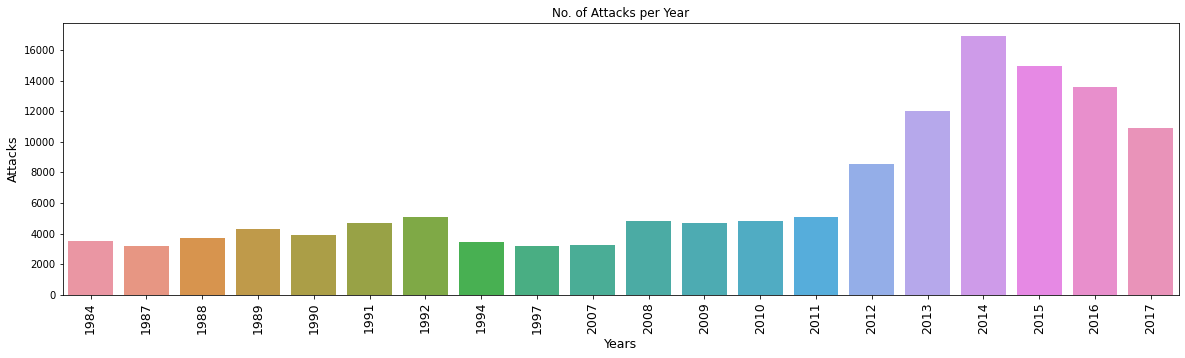

In [15]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['iyear'].value_counts()[:20].index,y=df['iyear'].value_counts().values[:20])
plt.title('No. of Attacks per Year')
plt.xticks(rotation=90,fontsize=12.5)
plt.xlabel('Years', fontsize=12.5)
plt.ylabel('Attacks', fontsize=12.5)
plt.show()

So we see that in 2014 there was a lot of number of attacks happened all over the world rather than other years.
Let's identify the group which has hosted numerous terrorist attacks

In [16]:
df['gname'].value_counts().head()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: gname, dtype: int64

This shows that total was 82782 groups which has hosted numerous terrorist attacks in which Taliban is the highest in hosted numerous terrorist attacks

Now show these in graph form

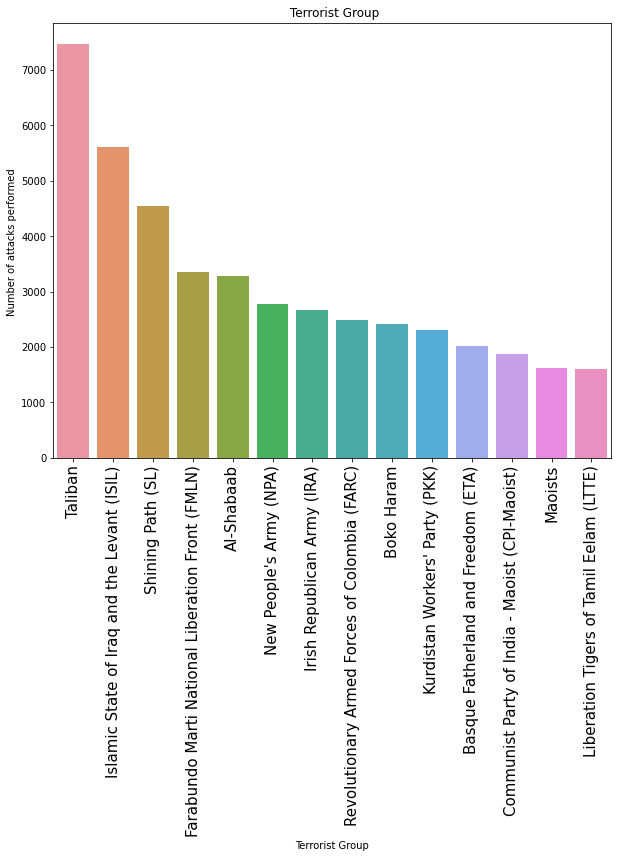

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['gname'].value_counts()[1:15].index,y=df['gname'].value_counts().values[1:15])
plt.title(' Terrorist Group')
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Terrorist Group")
plt.ylabel("Number of attacks performed ")
plt.show()

In [18]:
#Now we explore the Type of weapons used in executing the terrorist attacks
df['weaptype1_txt'].value_counts().head()


Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: weaptype1_txt, dtype: int64

It is clearly shown that Explosives are the top most weapon used for attack

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


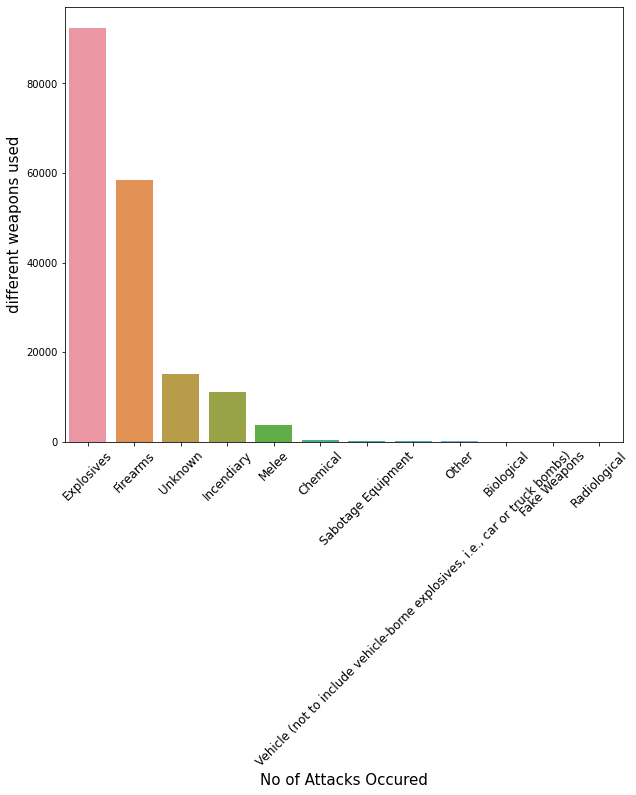

In [19]:
plt.subplots(figsize=(10,8))
sns.countplot(df["weaptype1_txt"],order=df['weaptype1_txt'].value_counts().index)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel("No of Attacks Occured", fontsize=15)
plt.ylabel("different weapons used", fontsize=15)
plt.show()

So in this way we can explore more analysing on the terrorism dataset. I hope you like this.